# DESCRIZIONE DEL PROBLEMA
Previsione della domanda di potenza termica immessa nella rete di teleriscaldamento della città di Brescia con
granularità oraria e orizzonte di previsione d+1, d+2 per un intero anno termico (dal 15 ottobre al 15 aprile)
Ogni mattina alle ore 8, viene valutata la previsione dall’ora successiva fino ai 2 giorni successivi

Esempio:
Oggi 28 maggio 2021 alle ore 8, devo prevedere tutte le ore successive fino al 30 maggio.
In particolare:
• d+1 rappresenta il 29 maggio dalle 00 alle 23.00
• d+2 rappresenta il 30 maggio dalle 00 alle 23.00

# DATI FORNITI
Serie storiche relative alla città in oggetto:
 * Valore reale di potenza termica oraria dal 01/01/2014 al 30/06/2020
     * [PotenzaTermicaOraria](#PotenzaTermicaOraria)
 * Valore delle previsioni di Temperatura oraria dal 02/11/2014 al 30/06/2020
     * [PrevisioniTemperatura](#PrevisioniTemperatura)
 * Domanda Elettrica italiana oraria dal 01/01/2015 al 30/06/2020
     * [DomandaElettrica](#DomandaElettrica)
 * Previsione irraggiamento dal 2018
     * [Previsioni_radiazione](#Previsioni_radiazione)
 * Dati reali dell’irraggiamento da giugno 2014
     * [Consuntivo_radiazione](#Consuntivo_radiazione)
 * Dati reali pressione atmosferica da novembre 2018
     * [consuntivi_meteo](#consuntivi_meteo)
 * Dati reali di precipitazione da novembre 2018
     * [consuntivi_meteo](#consuntivi_meteo)
 * Dati reali di umidità da novembre 2018
     * [consuntivi_meteo](#consuntivi_meteo)

Il modello potrà essere arricchito con tutti i dati rilevanti al fine di una previsione più accurata, esempio numero di
utenze residenziali, commerciali e industriali, fattori macro economici ricavabili ad esempio dagli open data del
comune di Brescia e ogni altro dato che si ritiene utile per la previsione

# VALUTAZIONE DEI MODELLI
Metriche di errore
 * MAPE (Mean Absolute Percentage Error)
 * MAE (Mean Absolute Error)

Le performance del modello di previsione verranno testate sull’interno anno termico 2020/2021 (15 ottobre 2020-15
aprile 2021), campione di test che non verrà fornite in fase di project work

# INPUT FORNITI e OUTPUT INPUT
 * Verranno forniti i file contenenti le serie storiche dei dati in formato .csv
 * La prima colonna di ogni file conterrà il timestamp (data e ora)
 * La seconda colonna le differenti grandezze fisiche
     * Potenza (MW)
     * Temperatura (Gradi C°)
     * Domanda elettrica
     * Irraggiamento (W/m2)
     * Pressione atmosferica (Bar)
     * Precipitazioni (mm)
     * Umidità (%)
### OUTPUT

 * Dovranno essere consegnati uno e più moduli python con all’interno una funzione con questa firma:
Previsione = forecast_TLR (file_name1, file_name2,…. file_name_n)
Dove:
previsione sarà un DataFrame con timestamp e forecast potenza al d+1, forecast potenza al d+2
file_name indicherà un file di input utilizzato (esempio potenza.csv, temperatura.csv, ecc…)
 * Documentazione associata su metodi utilizzati per la risoluzione (relazione finale)

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (15, 10)

import seaborn as sns
sns.set()

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
datasets = ["Consuntivo_radiazione","DomandaElettrica","PotenzaTermicaOraria","PrevisioniTemperatura","Previsioni_radiazione","consuntivi_meteo"] 

In [3]:
datasets

['Consuntivo_radiazione',
 'DomandaElettrica',
 'PotenzaTermicaOraria',
 'PrevisioniTemperatura',
 'Previsioni_radiazione',
 'consuntivi_meteo']

## Consuntivo_radiazione

In [4]:
df_consuntivo_radiazione = pd.read_csv('./data/Consuntivo_radiazione.csv', parse_dates=True, delimiter=';', index_col=0, decimal=',')

In [5]:
df_consuntivo_radiazione

,Radiazione (W/m2)
Date-Time,
2014-06-19 10:10:00,926.630005
2014-06-19 10:20:00,944.340027
2014-06-19 10:30:00,947.510010
2014-06-19 10:40:00,936.599976
2014-06-19 10:50:00,937.059998
...,...
2021-05-26 06:40:00,473.831451
2021-05-26 06:50:00,507.065399
2021-05-26 07:00:00,511.532234


In [6]:
df_consuntivo_radiazione.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364736 entries, 2014-06-19 10:10:00 to 2021-05-26 07:20:00
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Radiazione (W/m2)  362867 non-null  float64
dtypes: float64(1)
memory usage: 5.6 MB


In [7]:
df_consuntivo_radiazione.isna().sum()

Radiazione (W/m2)    1869
dtype: int64

In [8]:
df_consuntivo_radiazione = df_consuntivo_radiazione.resample('H').mean()

<ipython-input-9-e669e9592806>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_consuntivo_radiazione['2020'].plot()


<AxesSubplot:xlabel='Date-Time'>

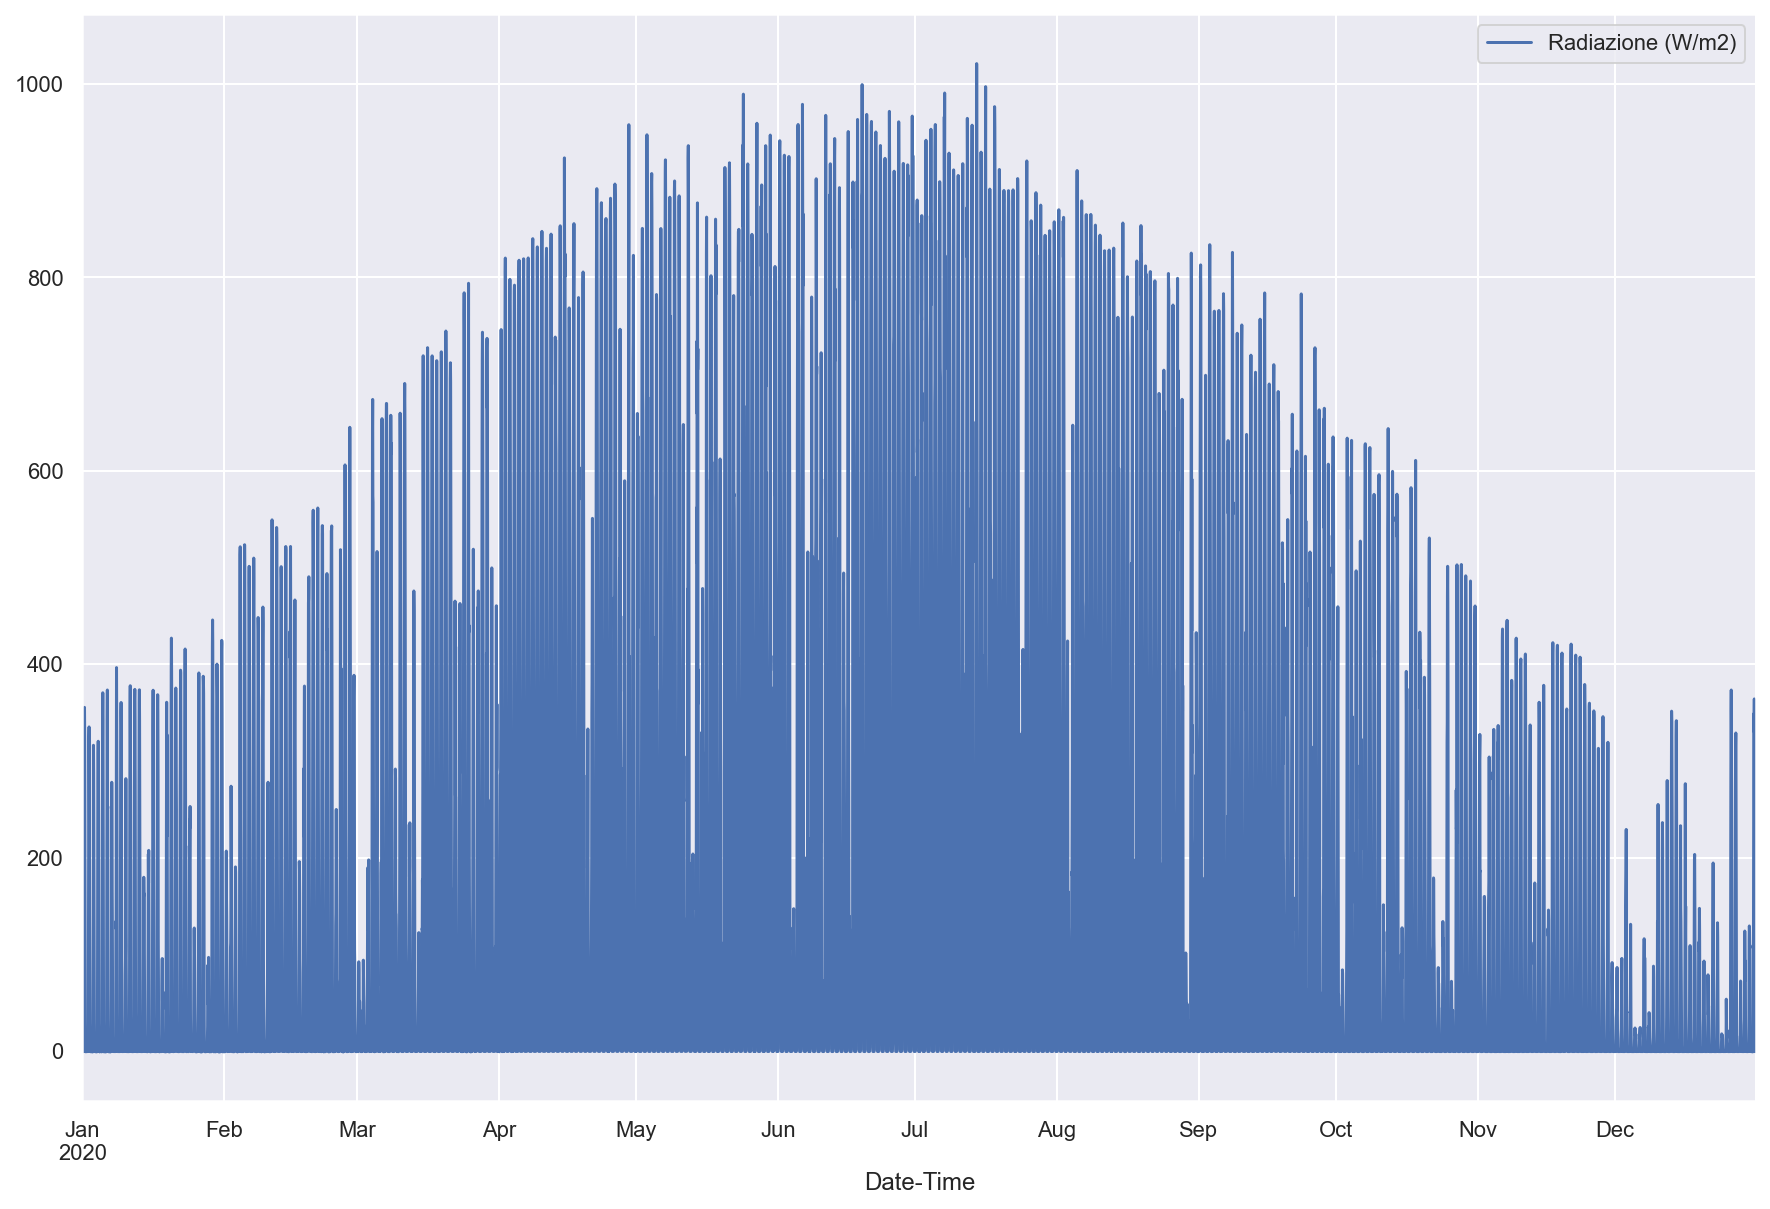

In [9]:
df_consuntivo_radiazione['2020'].plot()

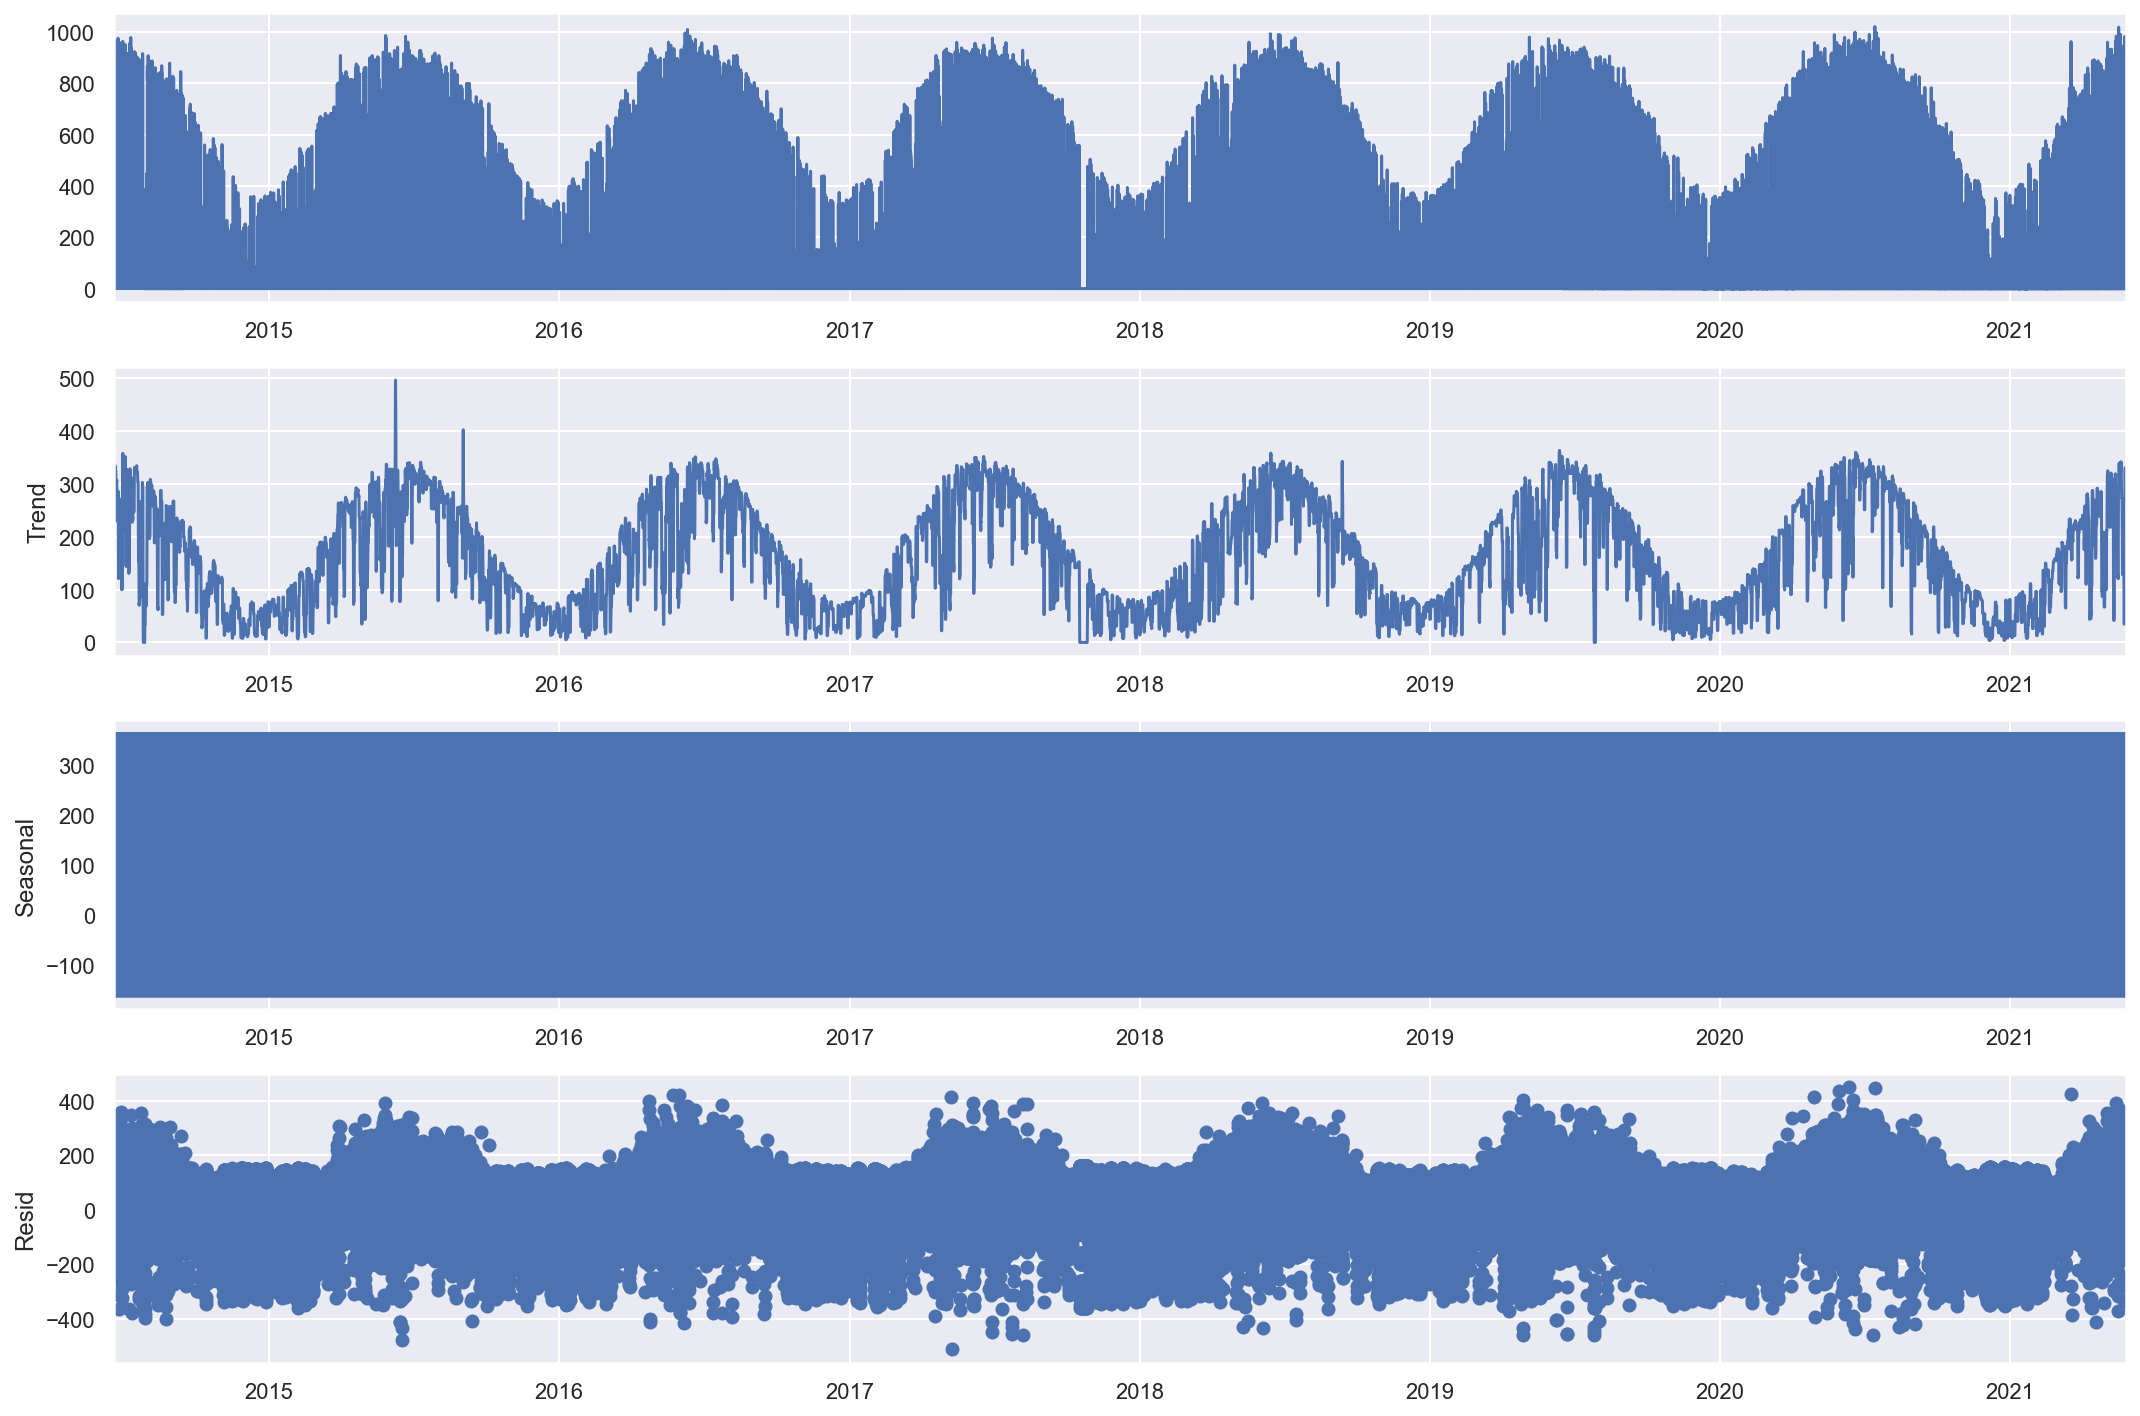

In [10]:
plot = seasonal_decompose(df_consuntivo_radiazione.fillna(0)).plot()

## DomandaElettrica

In [11]:
'./data/DomandaElettrica.csv'

'./data/DomandaElettrica.csv'

In [12]:
df_domanda_elettrica = pd.read_csv('./data/DomandaElettrica.csv', parse_dates=True, delimiter=';', index_col=3, decimal=',')

In [13]:
df_domanda_elettrica

,YEAR,MONTH,DAY,AREANAME,TOTALLOADVALUE
DATETIME,,,,,
2015-01-01 23:00:00,2015,1,1,Italy,21568
2015-01-01 22:00:00,2015,1,1,Italy,24116
2015-01-01 21:00:00,2015,1,1,Italy,26859
2015-01-01 20:00:00,2015,1,1,Italy,29168
2015-01-01 19:00:00,2015,1,1,Italy,30611
...,...,...,...,...,...
2020-06-30 04:00:00,2020,6,30,Italy,30015
2020-06-30 03:00:00,2020,6,30,Italy,26815
2020-06-30 02:00:00,2020,6,30,Italy,26438


In [14]:
df_domanda_elettrica = df_domanda_elettrica[['TOTALLOADVALUE']]

In [15]:
df_domanda_elettrica = df_domanda_elettrica.resample('H').mean()

<AxesSubplot:xlabel='DATETIME'>

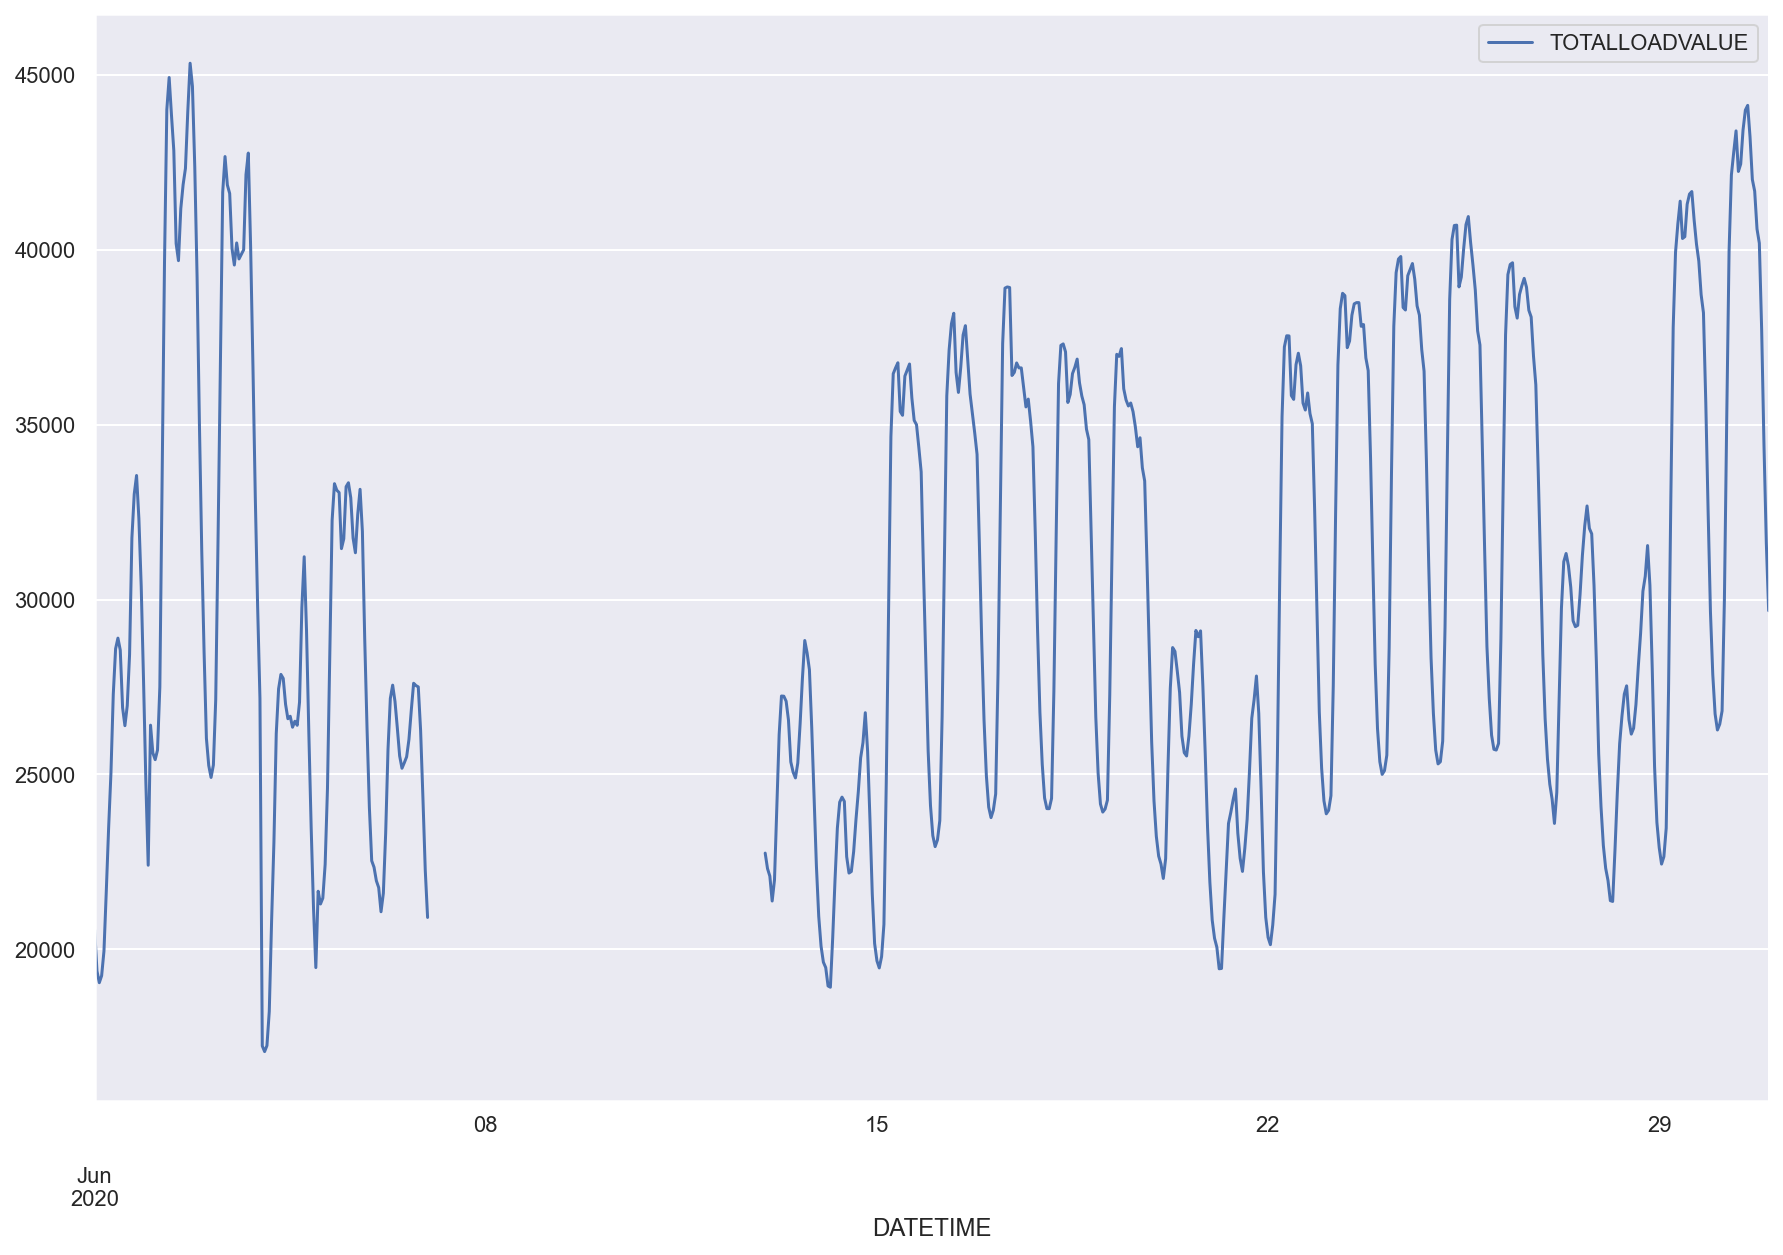

In [16]:
df_domanda_elettrica.loc['2020-06'].plot()

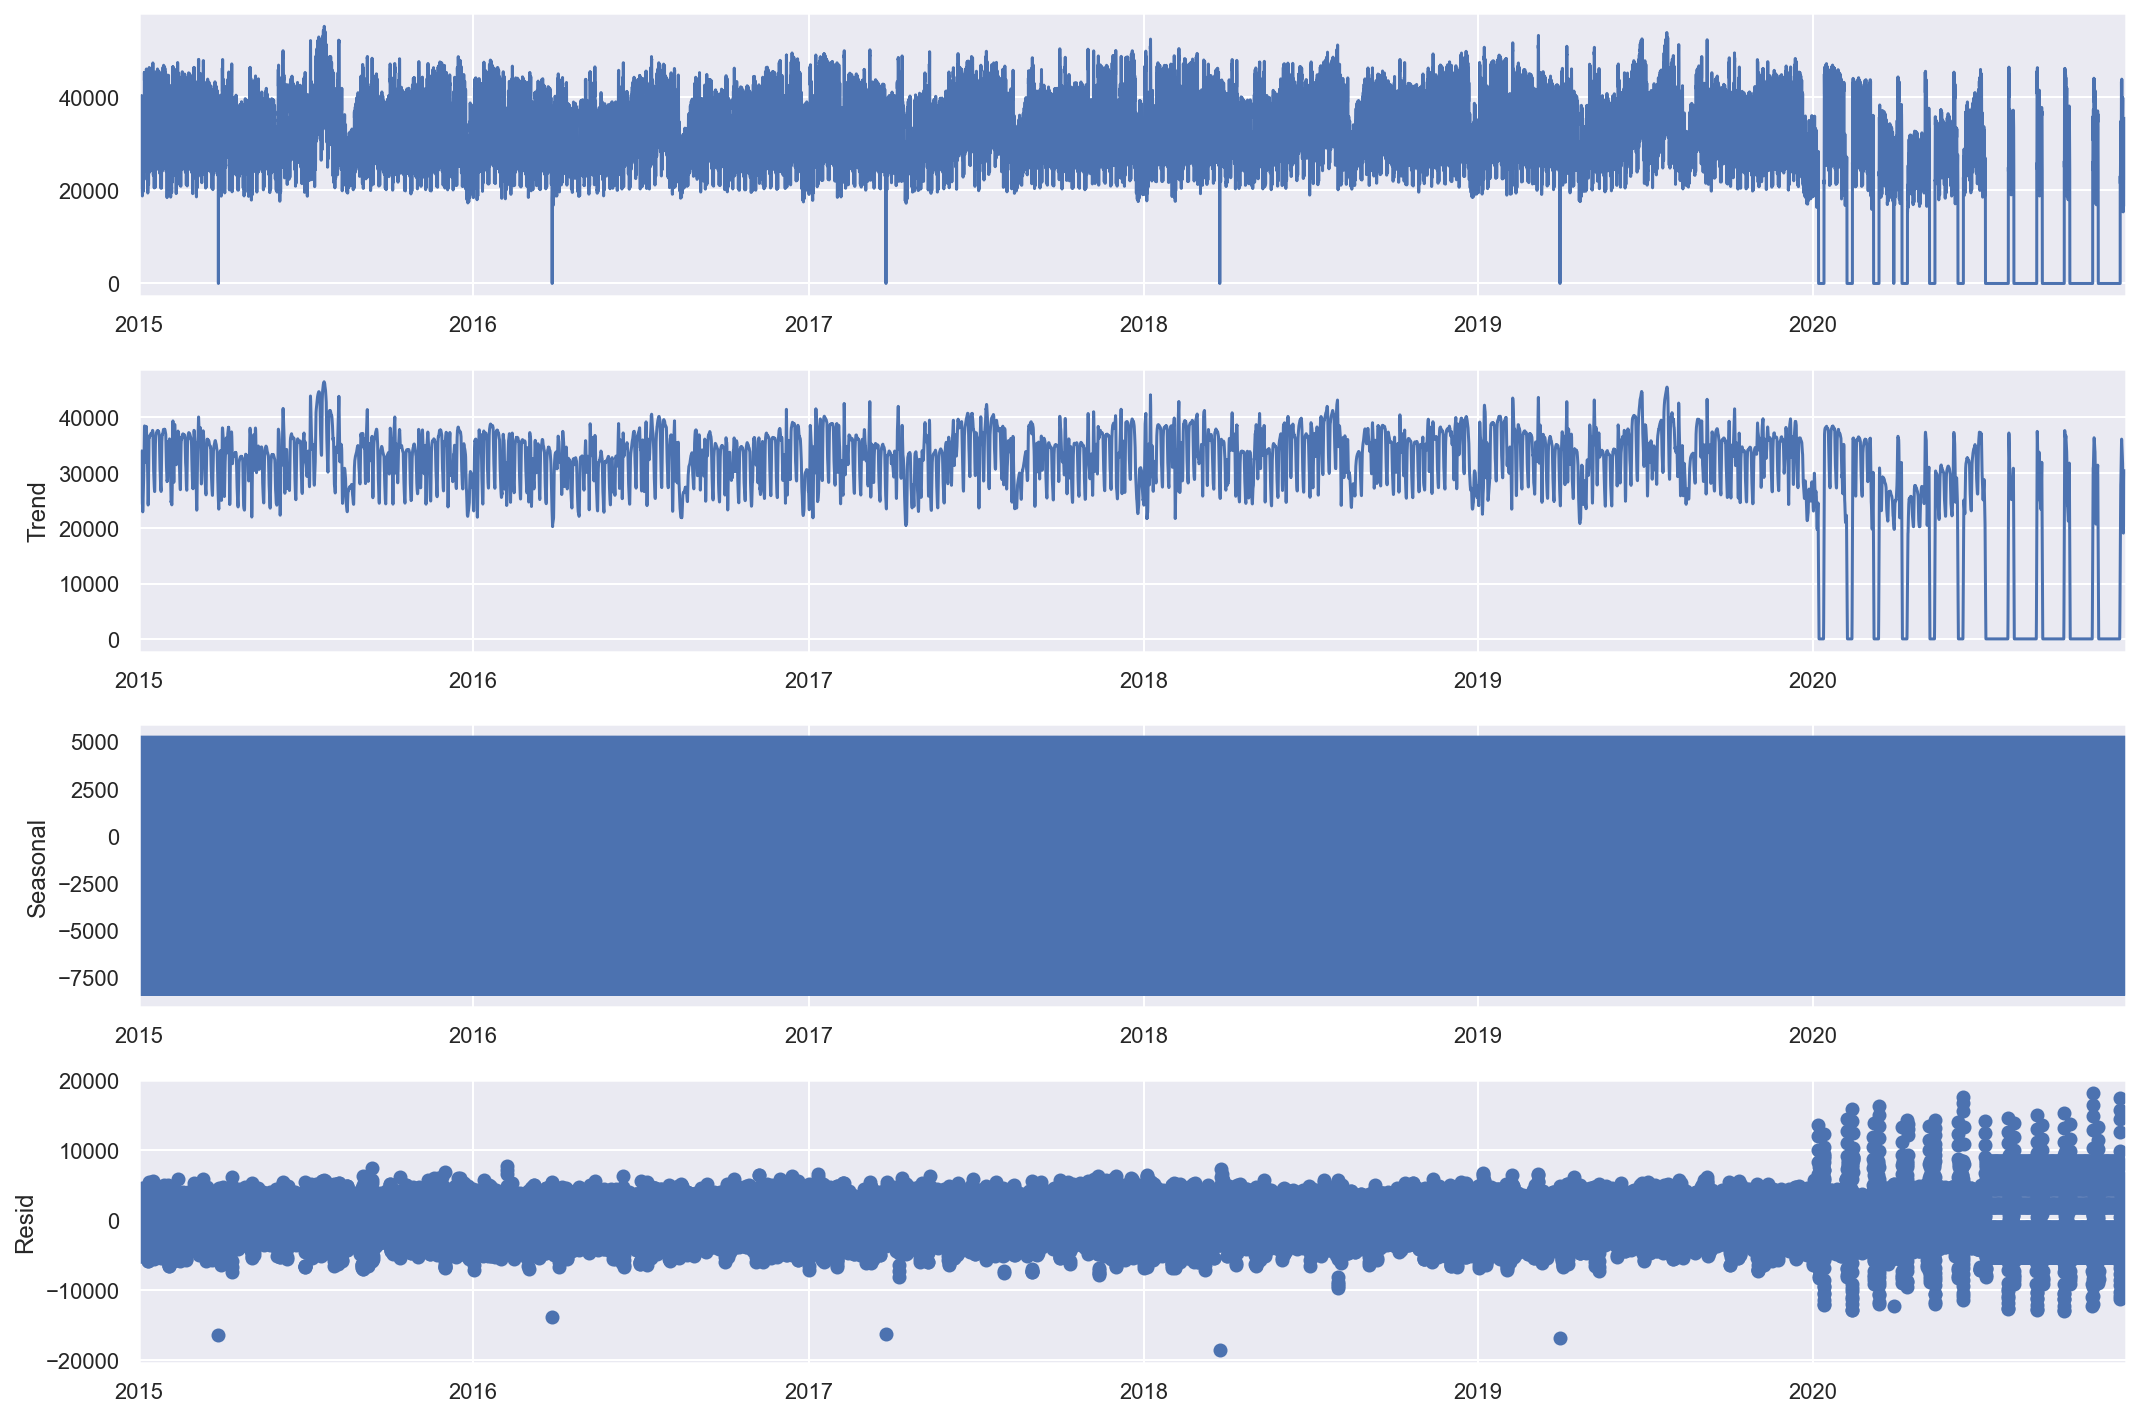

In [17]:
plot = seasonal_decompose(df_domanda_elettrica.fillna(0)).plot()

## PotenzaTermicaOraria

In [18]:
'./data/PotenzaTermicaOraria.csv'

'./data/PotenzaTermicaOraria.csv'

In [44]:
df_potenza_termica_oraria = pd.read_csv('./data/PotenzaTermicaOraria.csv', parse_dates=True, delimiter=';', index_col=0,
                                        decimal=',')

In [45]:
df_potenza_termica_oraria.info

<bound method DataFrame.info of                      ET Rete
Orario                      
2014-01-01 00:00:00     78.7
2014-01-01 00:10:00     79.8
2014-01-01 00:20:00     81.4
2014-01-01 00:30:00     80.8
2014-01-01 00:40:00     82.5
...                      ...
NaT                      NaN
NaT                      NaN
NaT                      NaN
NaT                      NaN
NaT                      NaN

[340972 rows x 1 columns]>

In [46]:
df_potenza_termica_oraria

,ET Rete
Orario,
2014-01-01 00:00:00,78.7
2014-01-01 00:10:00,79.8
2014-01-01 00:20:00,81.4
2014-01-01 00:30:00,80.8
2014-01-01 00:40:00,82.5
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [47]:
df_potenza_termica_oraria.shape

(340972, 1)

In [48]:
df_potenza_termica_oraria.isna()

,ET Rete
Orario,
2014-01-01 00:00:00,False
2014-01-01 00:10:00,False
2014-01-01 00:20:00,False
2014-01-01 00:30:00,False
2014-01-01 00:40:00,False
...,...
NaT,True
NaT,True
NaT,True


In [82]:
all(pd.isnull([None, None]))

True

In [84]:
[None, 1]

[None, 1]

In [85]:
[x for x in [None, 1] if x is not None]

[1]

In [81]:
np.logical_not(np.isnan([None, 1]))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [93]:
def very_mean(array_like):
    if all(pd.isnull(array_like)):
        return np.nan
    else:
        return np.array([x for x in array_like if x is not None]).mean()


In [94]:
np.array([None, 1])

array([None, 1], dtype=object)

In [96]:
very_mean(np.array([None, None]))

nan

In [99]:
df_ = df_potenza_termica_oraria.resample('H').apply(very_mean)

<AxesSubplot:xlabel='Orario'>

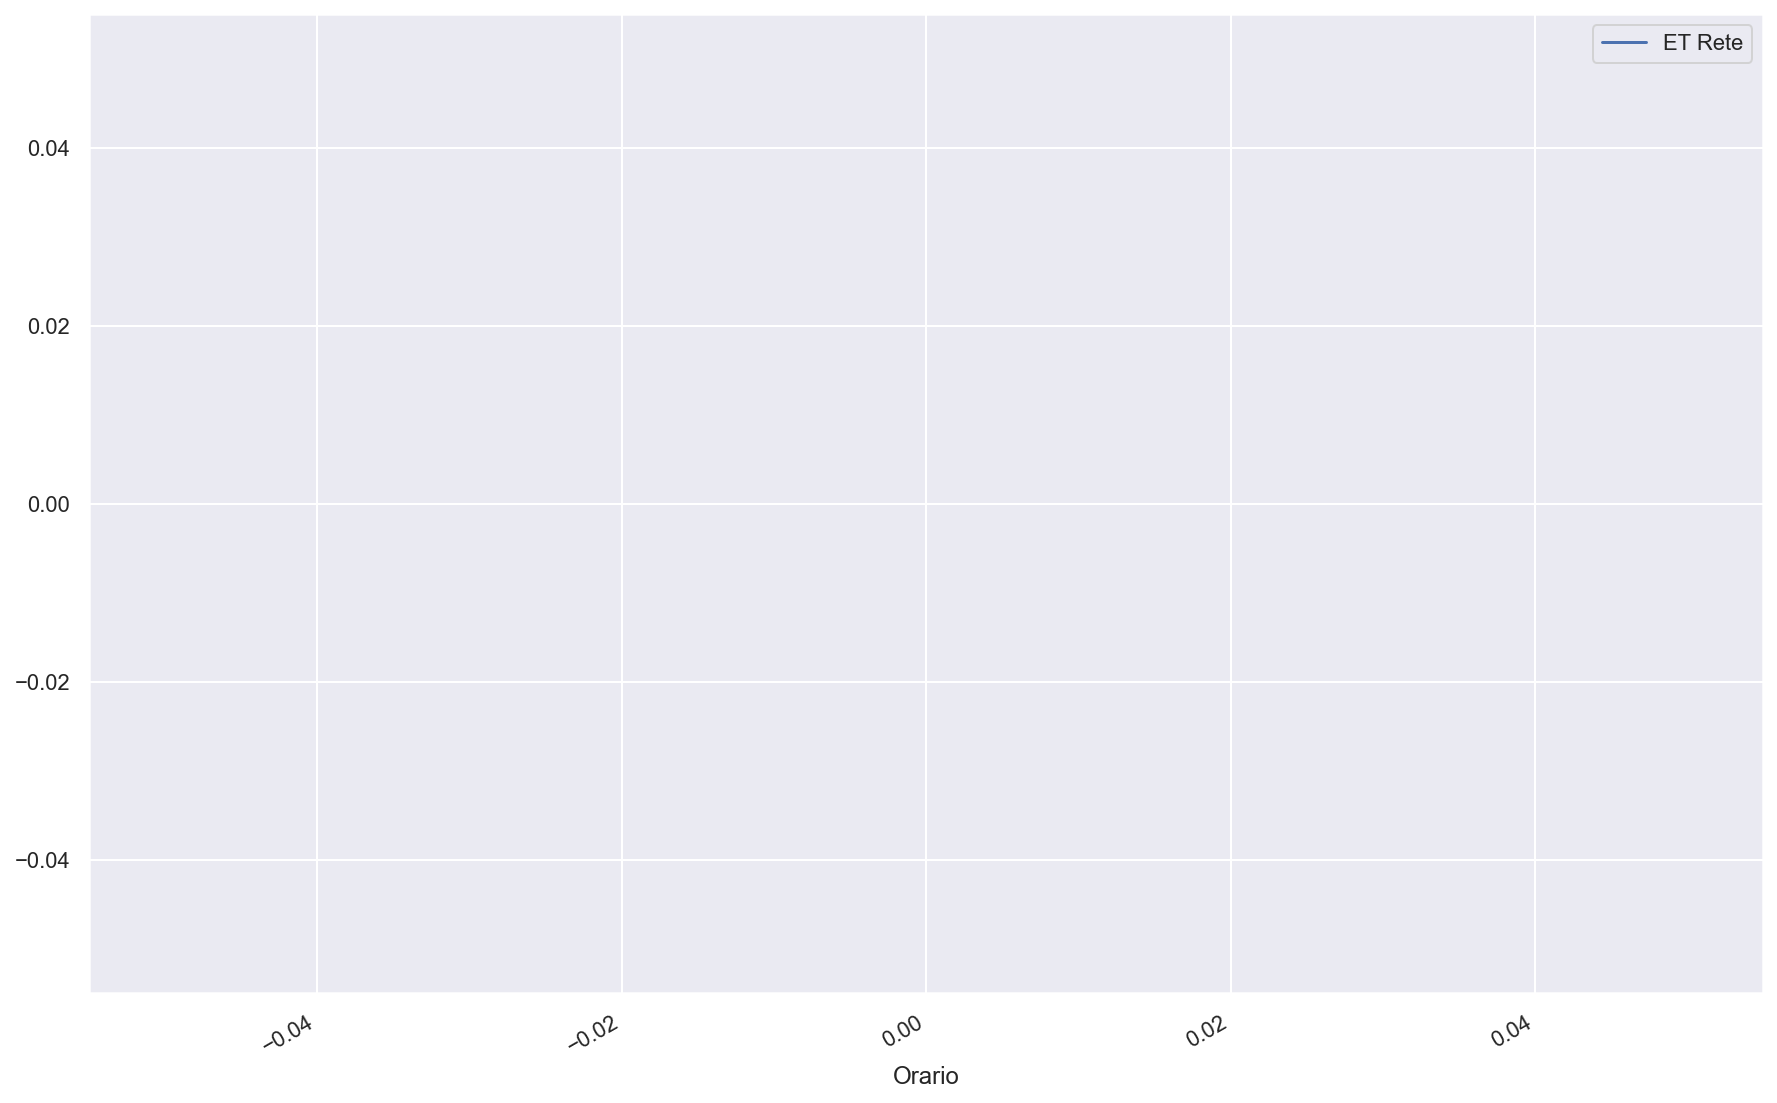

In [138]:
df_potenza_termica_oraria.loc['2020-'].plot()

In [132]:
df_potenza_termica_oraria[df_potenza_termica_oraria.isna()==True]

,ET Rete
Orario,
2014-01-01 00:00:00,NaN
2014-01-01 00:10:00,NaN
2014-01-01 00:20:00,NaN
2014-01-01 00:30:00,NaN
2014-01-01 00:40:00,NaN
...,...
NaT,NaN
NaT,NaN
NaT,NaN


In [128]:
for i in df_potenza_termica_oraria.loc['2020-07'].values:
    print(i)

[218.2884767]
[211.9572155]
[215.0900186]
[214.0646251]
[213.572534]
[211.3759296]
[217.0066149]
[213.9637172]
[216.3356257]
[210.0260879]
[215.168834]
[212.6426383]
[212.1083645]
[214.1018124]
[219.0766041]
[213.081461]
[219.6412712]
[222.5443703]
[226.6656063]
[221.0326292]
[223.9895732]
[225.2501497]
[227.1910556]
[231.7091481]
[238.0970564]
[245.7523522]
[238.8094785]
[251.9435047]
[273.4048059]
[266.0745744]
[300.2589924]
[309.1425839]
[304.4523062]
[317.169895]
[310.4805988]
[356.993833]
[414.1117237]
[432.6408031]
[411.2394098]
[420.9193566]
[445.2934289]
[444.6391567]
[438.8442873]
[468.4088849]
[430.6098696]
[439.7568288]
[443.3801384]
[429.493951]
[449.754952]
[452.5870458]
[435.2042346]
[443.8920802]
[460.7226442]
[457.5894366]
[443.7844066]
[439.0643959]
[417.6580081]
[408.4826917]
[407.0554453]
[425.4494647]
[463.8121375]
[462.6655304]
[457.1876064]
[449.2217001]
[449.1783323]
[453.0493822]
[462.2820762]
[469.4650332]
[463.7152441]
[461.5950736]
[453.9445323]
[450.2798198]

In [24]:
df_potenza_termica_oraria = df_potenza_termica_oraria.resample('H').mean()

In [43]:
df_potenza_termica_oraria

,ET Rete
Orario,
2014-01-01 00:00:00,80.816667
2014-01-01 01:00:00,81.700000
2014-01-01 02:00:00,79.933333
2014-01-01 03:00:00,79.250000
2014-01-01 04:00:00,83.583333
...,...
2020-12-06 19:00:00,46.844834
2020-12-06 20:00:00,47.225418
2020-12-06 21:00:00,46.416578


In [26]:
df_potenza_termica_oraria.describe()

,ET Rete
count,56689.000000
mean,141.644708
std,119.362470
min,-0.216667
25%,40.883333
50%,89.266667
75%,220.462590
max,583.333333


In [27]:
df_potenza_termica_oraria['2020-06-08':'2020-06-15']

,ET Rete
Orario,
2020-06-08 00:00:00,NaN
2020-06-08 01:00:00,NaN
2020-06-08 02:00:00,NaN
2020-06-08 03:00:00,NaN
2020-06-08 04:00:00,NaN
...,...
2020-06-15 19:00:00,47.924989
2020-06-15 20:00:00,47.853854
2020-06-15 21:00:00,46.713010


<AxesSubplot:xlabel='Orario'>

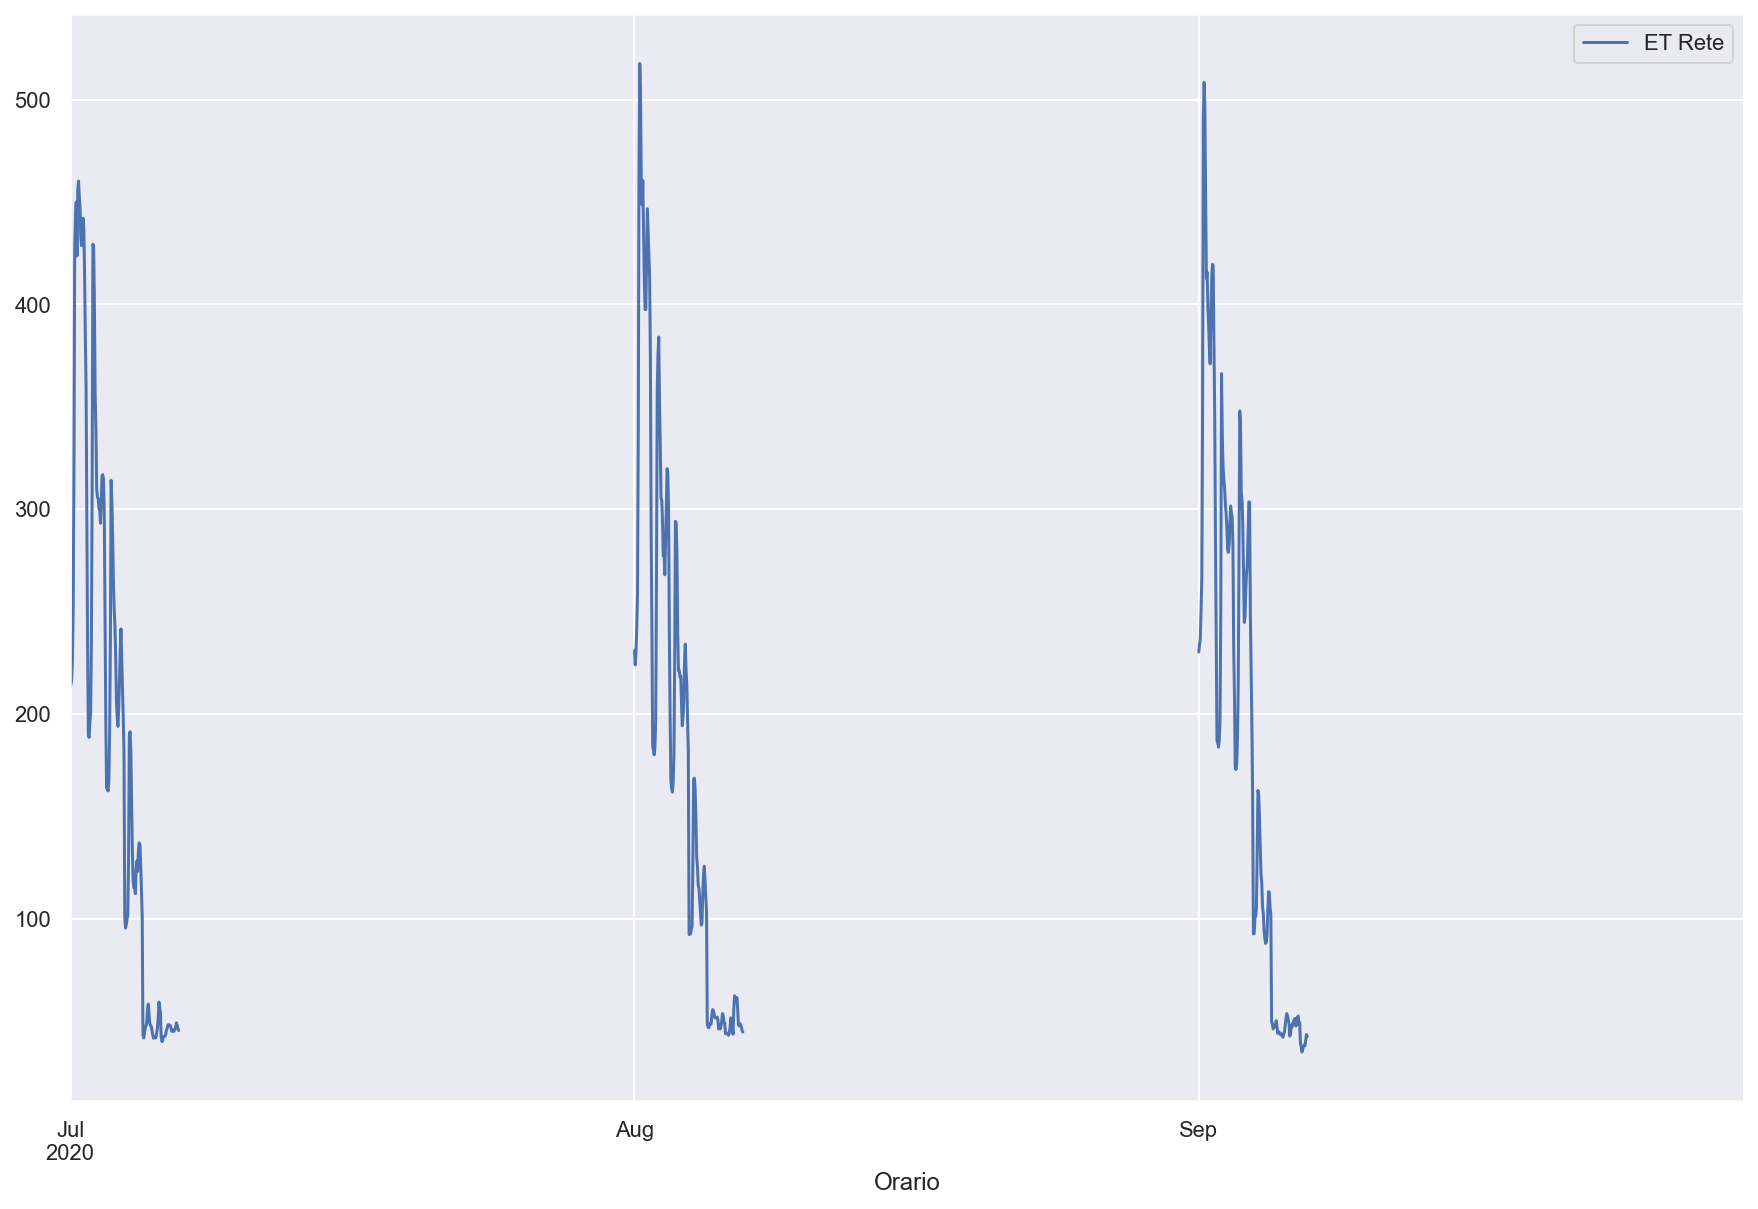

In [28]:
df_potenza_termica_oraria['2020-07':'2020-09'].plot()

<ipython-input-139-238d09763273>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_potenza_termica_oraria['2020'].plot()


<AxesSubplot:xlabel='Orario'>

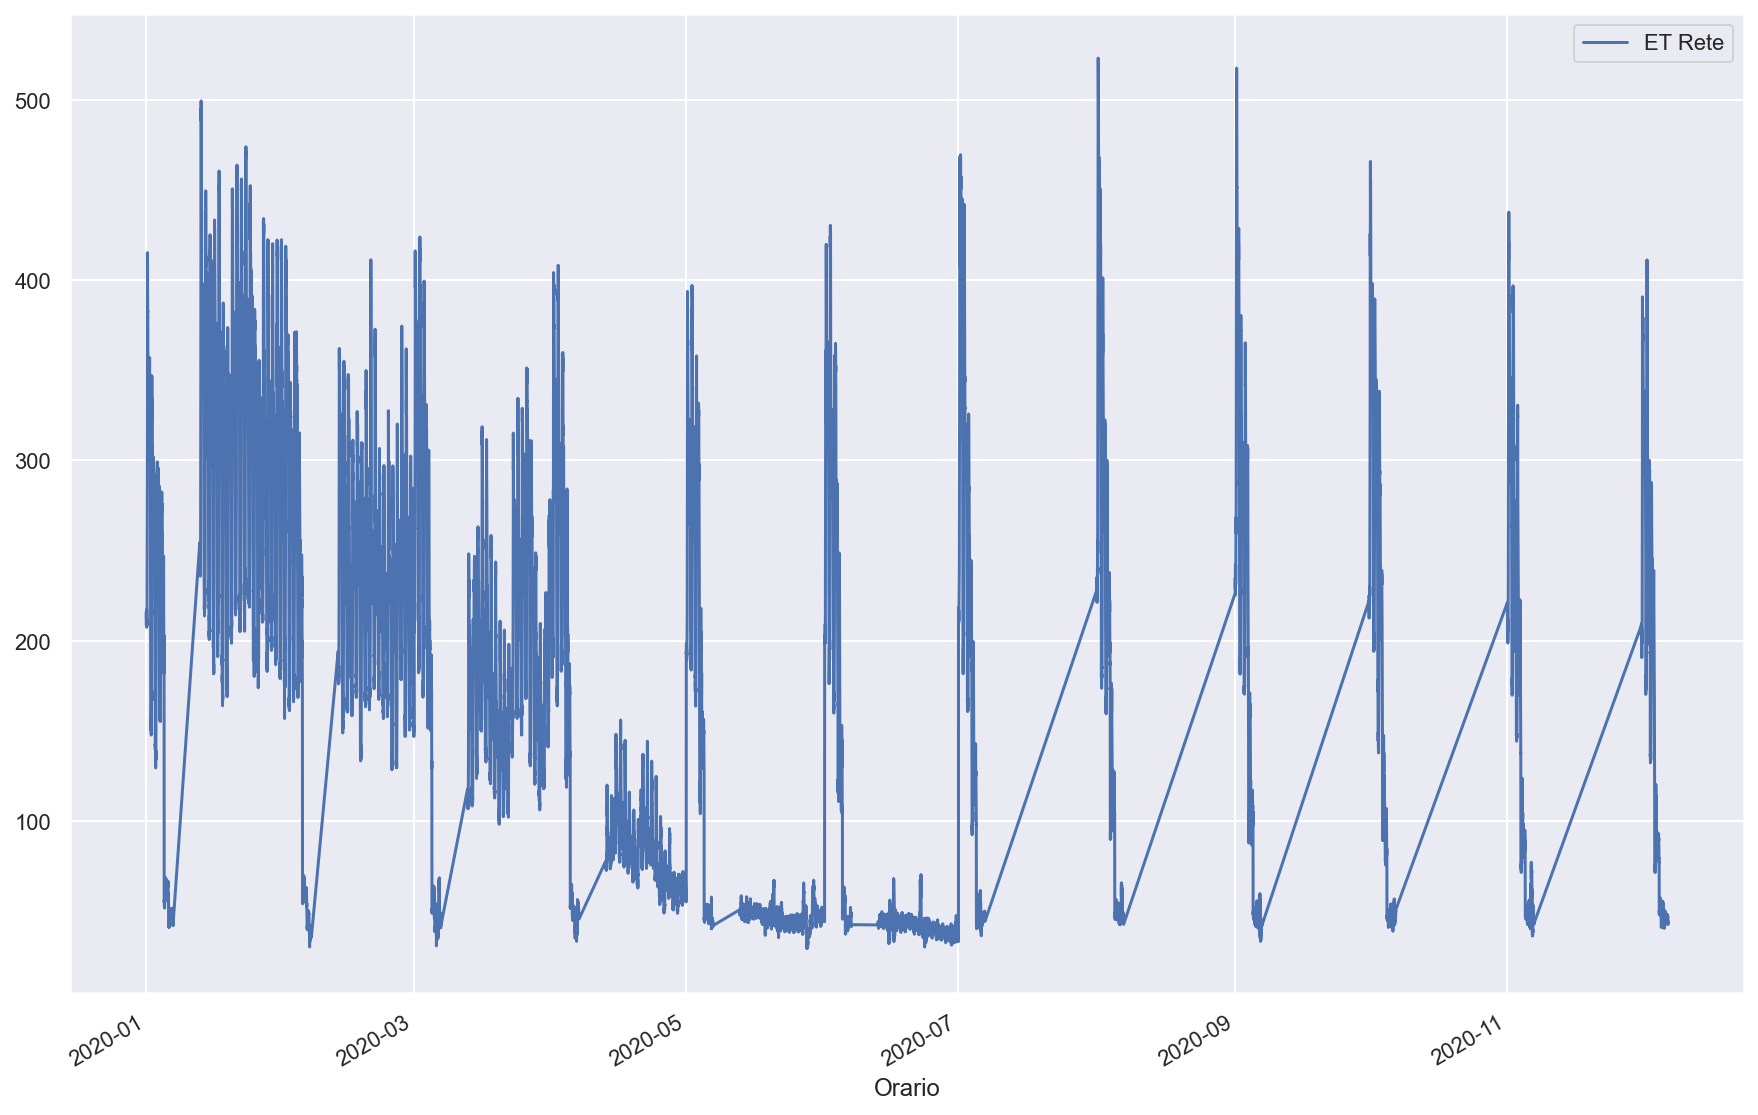

In [139]:
df_potenza_termica_oraria['2020'].plot()

## PrevisioniTemperatura

In [30]:
datasets

['Consuntivo_radiazione',
 'DomandaElettrica',
 'PotenzaTermicaOraria',
 'PrevisioniTemperatura',
 'Previsioni_radiazione',
 'consuntivi_meteo']

In [31]:
df_previsioni_temperatura = pd.read_csv('./data/PrevisioniTemperatura.csv', parse_dates=['DataEmissione', 'DataPrevisione'], delimiter=';', encoding='latin-1')

In [32]:
df_previsioni_temperatura.tail(20)

,IdPrevisione,FornitorePrevisioni,DataEmissione,DataPrevisione,TOra00-01,TOra01-02,TOra02-03,TOra03-04,TOra04-05,TOra05-06,...,TOra14-15,TOra15-16,TOra16-17,TOra17-18,TOra18-19,TOra19-20,TOra20-21,TOra21-22,TOra22-23,TOra23-24
5225,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-21,2020-06-25,"21,34670639","20,17765045","18,8164444","17,6646328","17,03937531","17,09989929",...,"28,76477051","29,17585373","29,35281944","29,29582405","28,97581863","28,34341049","27,35242844","25,99502754","24,34062958","22,56575584"
5226,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-29,2020-06-30,"23,01828766","22,5705986","22,12633133","21,76767731","21,60597229","21,73415756",...,"31,27346992","31,74257088","31,90219688","31,77398872","31,39777756","30,82300377","30,09976006","29,27089691","28,36680412","27,40449715"
5227,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-29,2020-01-07,"26,41290665","25,3239212","24,28343964","23,44250679","22,91679001","22,77078629",...,"30,72413254","31,08268356","31,08535957","30,71083832","29,96304321","28,87677574","27,52339172","26,01467323","24,50190926","23,16593361"
5228,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-29,2020-02-07,"23,2902565","22,78117752","21,85382271","20,94573402","20,42068863","20,47960281",...,"31,58978271","32,13430023","32,44907761","32,49034882","32,18338394","31,44334793","30,21324539","28,51314354","26,48903656","24,44279099"
5229,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-29,2020-03-07,"24,34372902","23,69791412","22,71424484","21,7829895","21,19280052","21,05696297",...,"21,84039116","21,65837669","21,69249725","21,9144268","22,21242332","22,41555405","22,34251595","21,86869621","20,9981823","19,91926193"
5230,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-28,2020-06-29,"24,58994293","23,16548538","21,39601517","19,89983749","19,11964989","19,2385807",...,"30,84513474","31,18154335","31,41040611","31,49367714","31,3223381","30,74534607","29,62584686","27,91664886","25,73836708","23,43383789"
5231,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-28,2020-06-30,"22,92586327","22,17191696","21,3694973","20,7078476","20,3578968","20,42222595",...,"30,17872429","30,74303818","31,05090332","31,0913105","30,85303497","30,32851791","29,52340889","28,47037125","27,24373627","25,96918106"
5232,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-28,2020-01-07,"24,94775391","24,11099625","23,48659134","23,04334068","22,77759171","22,71428871",...,"31,65833473","32,26436615","32,36442947","31,92055702","30,95911026","29,57319832","27,91576195","26,18262672","24,58589745","23,31939697"
5233,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-28,2020-02-07,"23,20099258","22,82347107","22,39868927","22,04939461","21,89006042","21,9937439",...,"30,52232933","31,25555229","31,70739937","31,80682945","31,49436188","30,73863792","29,5566082","28,03348732","26,33618164","24,71112633"
5234,1,SOCIET· METEOROLOGICA SUBALPINA,2020-06-25,2020-06-26,"21,04283524","20,19433975","19,13360977","18,22328758","17,74393082","17,83487701",...,"28,78061104","29,42123604","29,82973862","29,95739555","29,73442268","29,08989716","27,98520279","26,45560074","24,6496315","23,20000076"


In [33]:
df_previsioni_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   IdPrevisione         5245 non-null   int64         
 1   FornitorePrevisioni  5245 non-null   object        
 2   DataEmissione        5245 non-null   datetime64[ns]
 3   DataPrevisione       5245 non-null   datetime64[ns]
 4   TOra00-01            5245 non-null   object        
 5   TOra01-02            5245 non-null   object        
 6   TOra02-03            5245 non-null   object        
 7   TOra03-04            5245 non-null   object        
 8   TOra04-05            5245 non-null   object        
 9   TOra05-06            5245 non-null   object        
 10  TOra06-07            5245 non-null   object        
 11  TOra07-08            5245 non-null   object        
 12  TOra08-09            5245 non-null   object        
 13  TOra09-10            5245 non-nul

## Previsioni_radiazione

In [34]:
'./data/Previsioni_radiazione.csv'

'./data/Previsioni_radiazione.csv'

In [35]:
df_previsioni_radiazione = pd.read_csv('./data/Previsioni_radiazione.csv', parse_dates=True, sep=';')
df_previsioni_radiazione

,ORARIO,RADIAZIONE (W/m2)
0,01-GEN-18 00:00:00,0
1,01-GEN-18 01:00:00,0
2,01-GEN-18 02:00:00,0
3,01-GEN-18 03:00:00,0
4,01-GEN-18 04:00:00,0
...,...,...
29920,31-MAG-21 19:00:00,0
29921,31-MAG-21 20:00:00,0
29922,31-MAG-21 21:00:00,0
29923,31-MAG-21 22:00:00,0


In [36]:
%%time
def clear_month(data):
    d = {'gen': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'mag': '05', 'giu': '06', 'lug': '07', 'ago': '08', 'set': '09',
       'ott': '10', 'nov': '11', 'dic': '12'}
    for k, v in d.items():
        if data.split()[0].split('-')[1] == k:
            data = data.replace(k,v)
    return data

df_previsioni_radiazione = pd.read_csv('./data/Previsioni_radiazione.csv', parse_dates=True, sep=';')

df_previsioni_radiazione['ORARIO'] = pd.to_datetime(df_previsioni_radiazione['ORARIO'].str.lower().apply(clear_month))
df_previsioni_radiazione.set_index('ORARIO', inplace=True)

Wall time: 2.51 s


In [37]:
df_previsioni_radiazione.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2021-05-31 14:00:00', '2021-05-31 15:00:00',
               '2021-05-31 16:00:00', '2021-05-31 17:00:00',
               '2021-05-31 18:00:00', '2021-05-31 19:00:00',
               '2021-05-31 20:00:00', '2021-05-31 21:00:00',
               '2021-05-31 22:00:00', '2021-05-31 23:00:00'],
              dtype='datetime64[ns]', name='ORARIO', length=29925, freq=None)

## consuntivi_meteo

In [38]:
datasets

['Consuntivo_radiazione',
 'DomandaElettrica',
 'PotenzaTermicaOraria',
 'PrevisioniTemperatura',
 'Previsioni_radiazione',
 'consuntivi_meteo']

In [39]:
df_consuntivi_meteo = pd.read_csv('./data/consuntivi_meteo.csv', parse_dates=True, sep=';', index_col=0, decimal=',')

In [40]:
df_consuntivi_meteo

,Precipitazioni (mm),Pressione (bar),Umidita (%)
Date-Time,,,
2018-11-01 12:00:00,1.132083,1016.599976,84.0
2018-11-01 13:00:00,1.132083,1016.500000,81.0
2018-11-01 14:00:00,1.132083,1016.900024,77.0
2018-11-01 15:00:00,1.132083,1017.299988,78.0
2018-11-01 16:00:00,1.132083,1017.700012,81.0
...,...,...,...
2021-05-24 15:00:00,0.635000,1013.900024,95.0
2021-05-24 16:00:00,0.645417,1013.200012,93.0
2021-05-24 17:00:00,0.666667,1013.200012,93.0


In [41]:
df_consuntivi_meteo.index

DatetimeIndex(['2018-11-01 12:00:00', '2018-11-01 13:00:00',
               '2018-11-01 14:00:00', '2018-11-01 15:00:00',
               '2018-11-01 16:00:00', '2018-11-01 17:00:00',
               '2018-11-01 18:00:00', '2018-11-01 19:00:00',
               '2018-11-01 20:00:00', '2018-11-01 21:00:00',
               ...
               '2021-05-24 10:00:00', '2021-05-24 11:00:00',
               '2021-05-24 12:00:00', '2021-05-24 13:00:00',
               '2021-05-24 14:00:00', '2021-05-24 15:00:00',
               '2021-05-24 16:00:00', '2021-05-24 17:00:00',
               '2021-05-24 18:00:00', '2021-05-24 19:00:00'],
              dtype='datetime64[ns]', name='Date-Time', length=22448, freq=None)

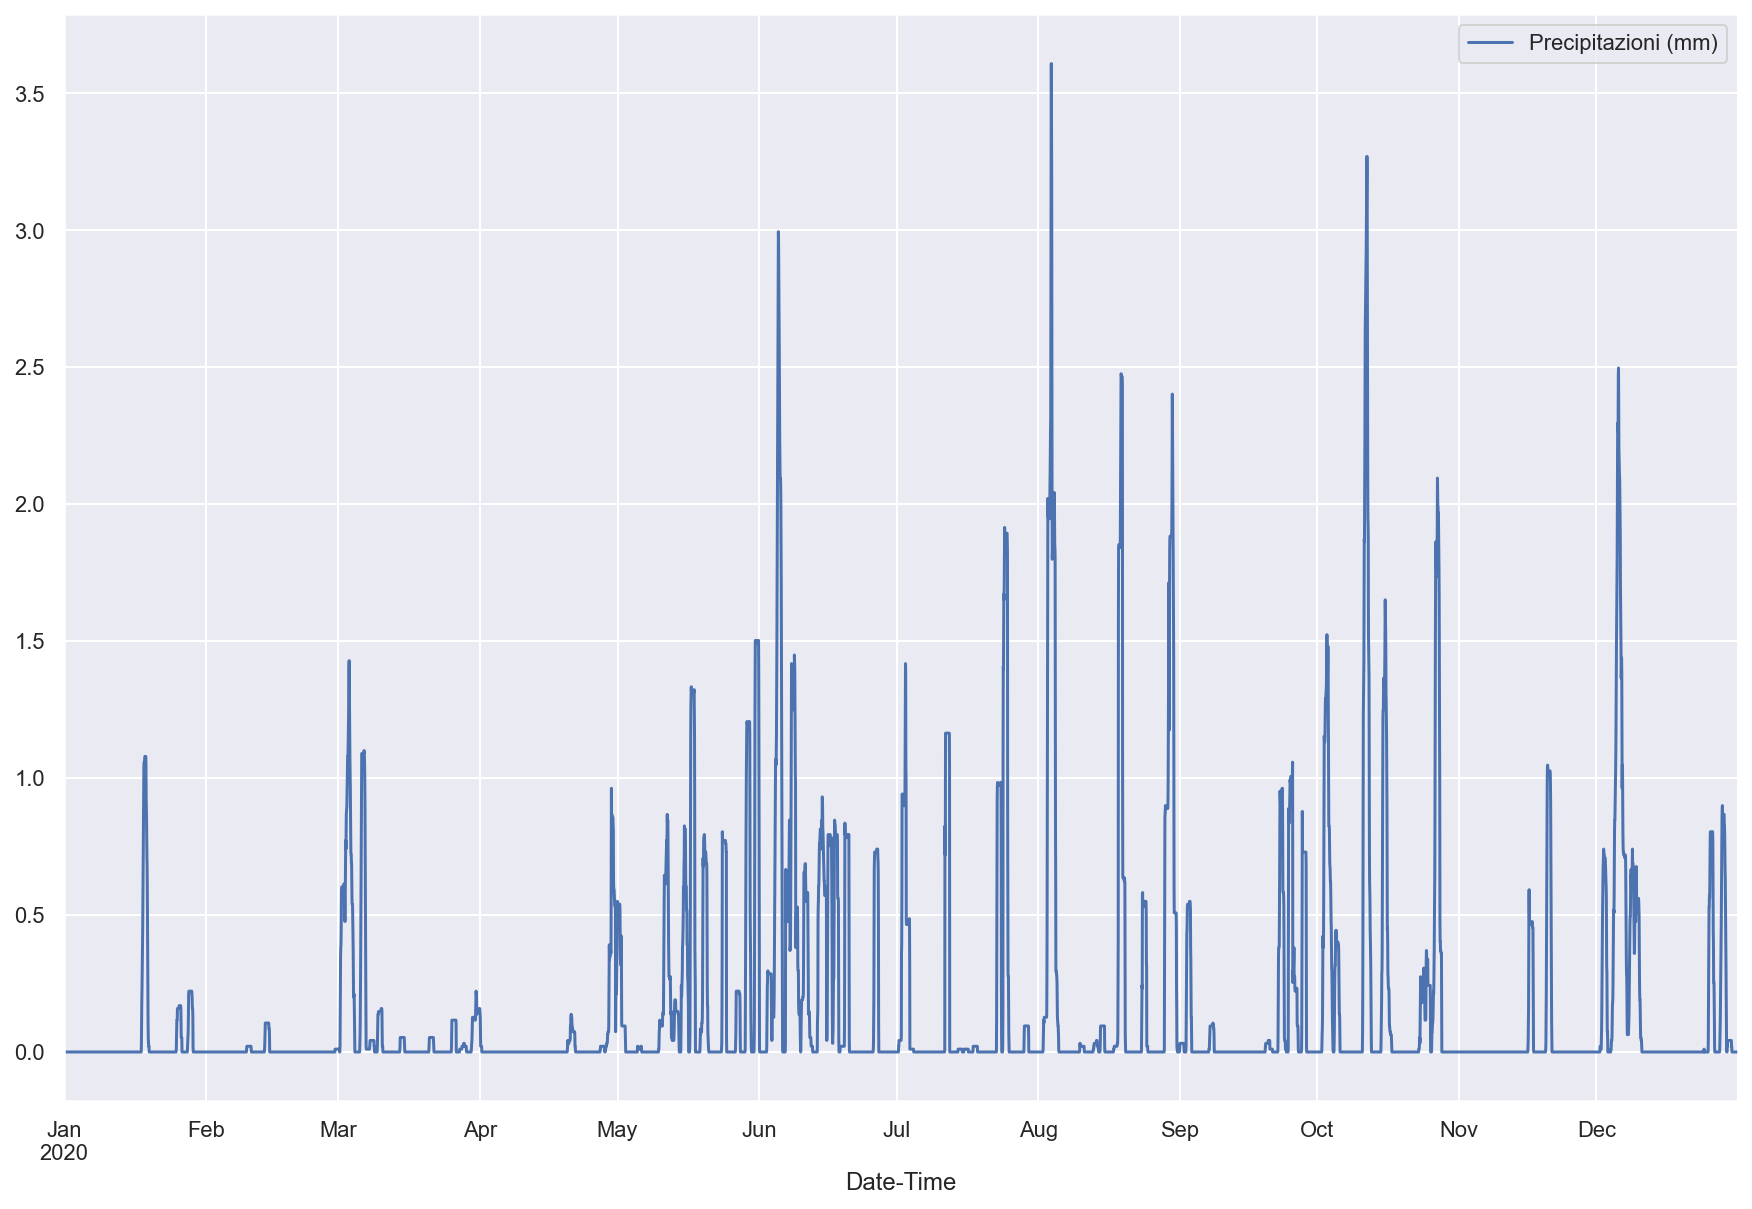

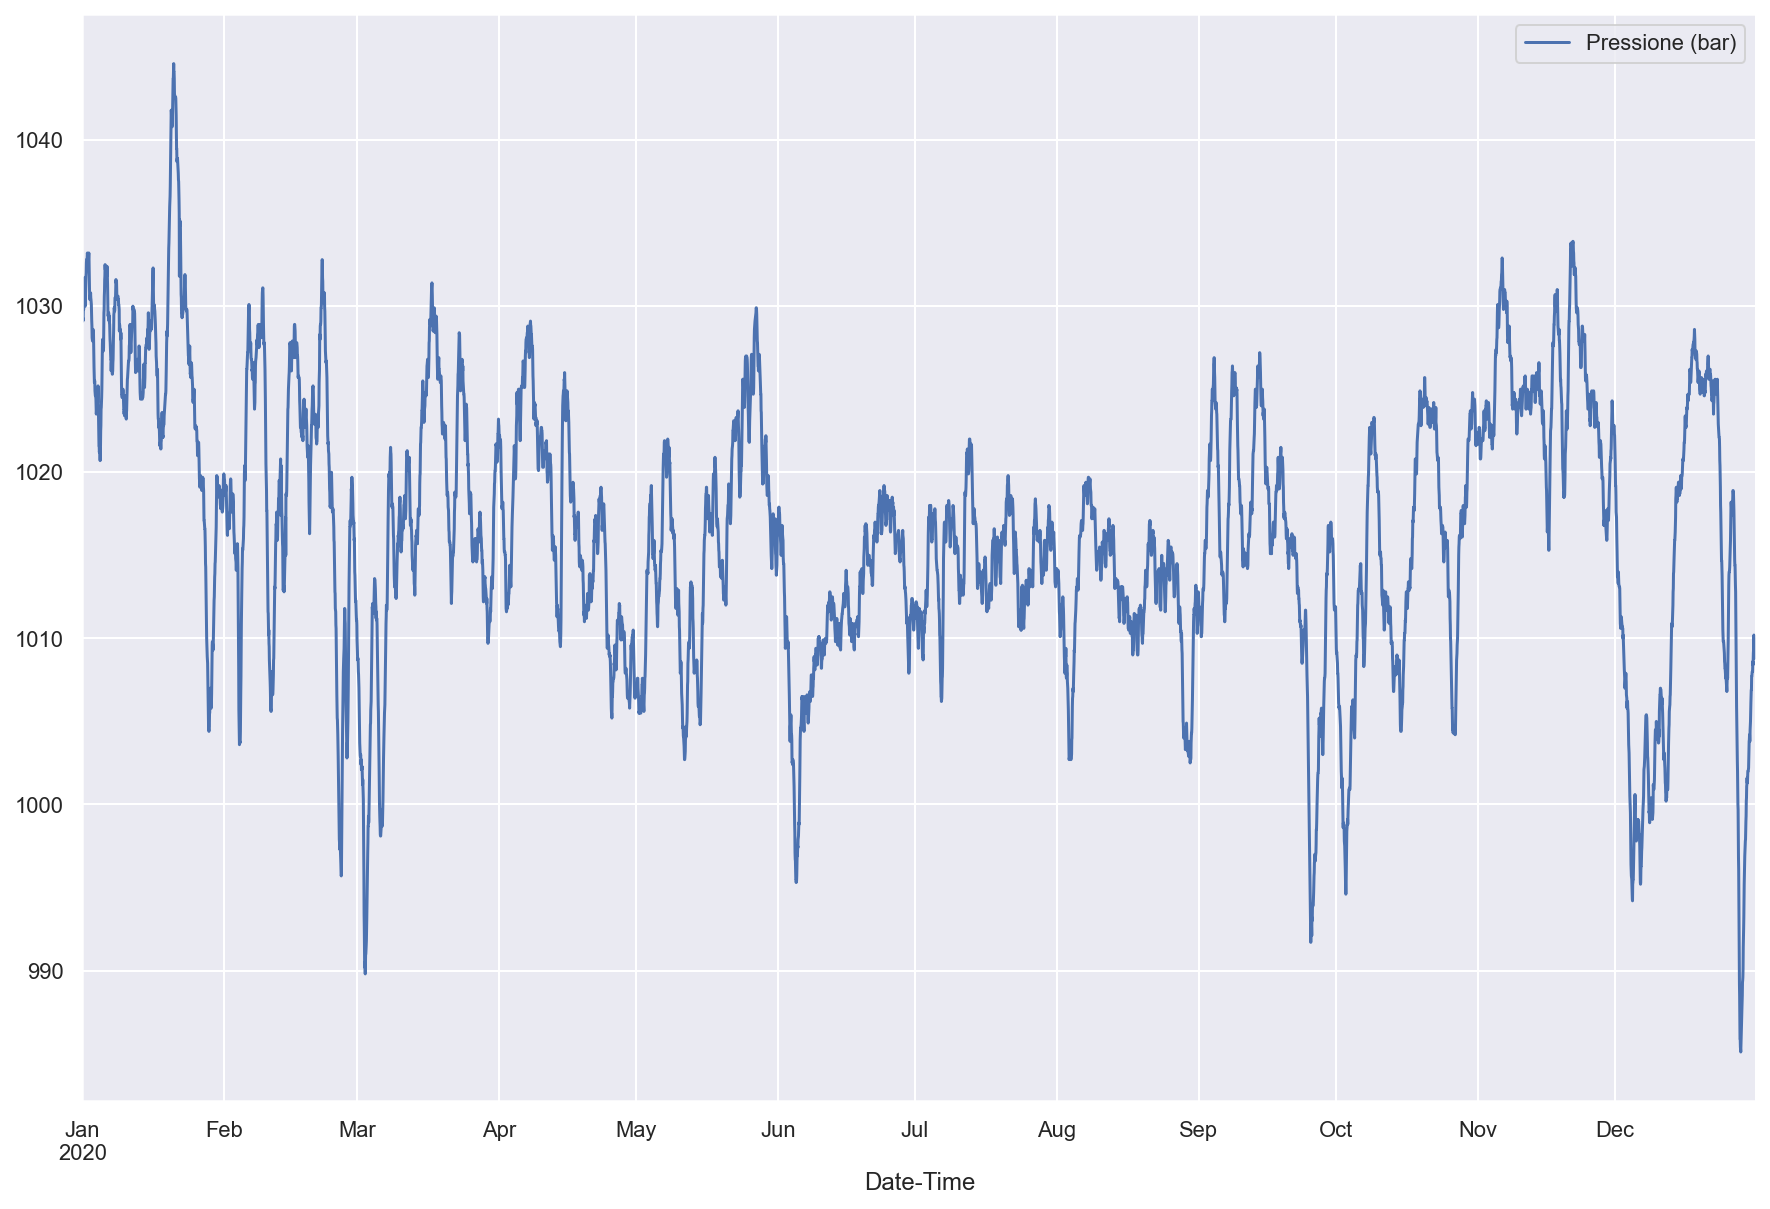

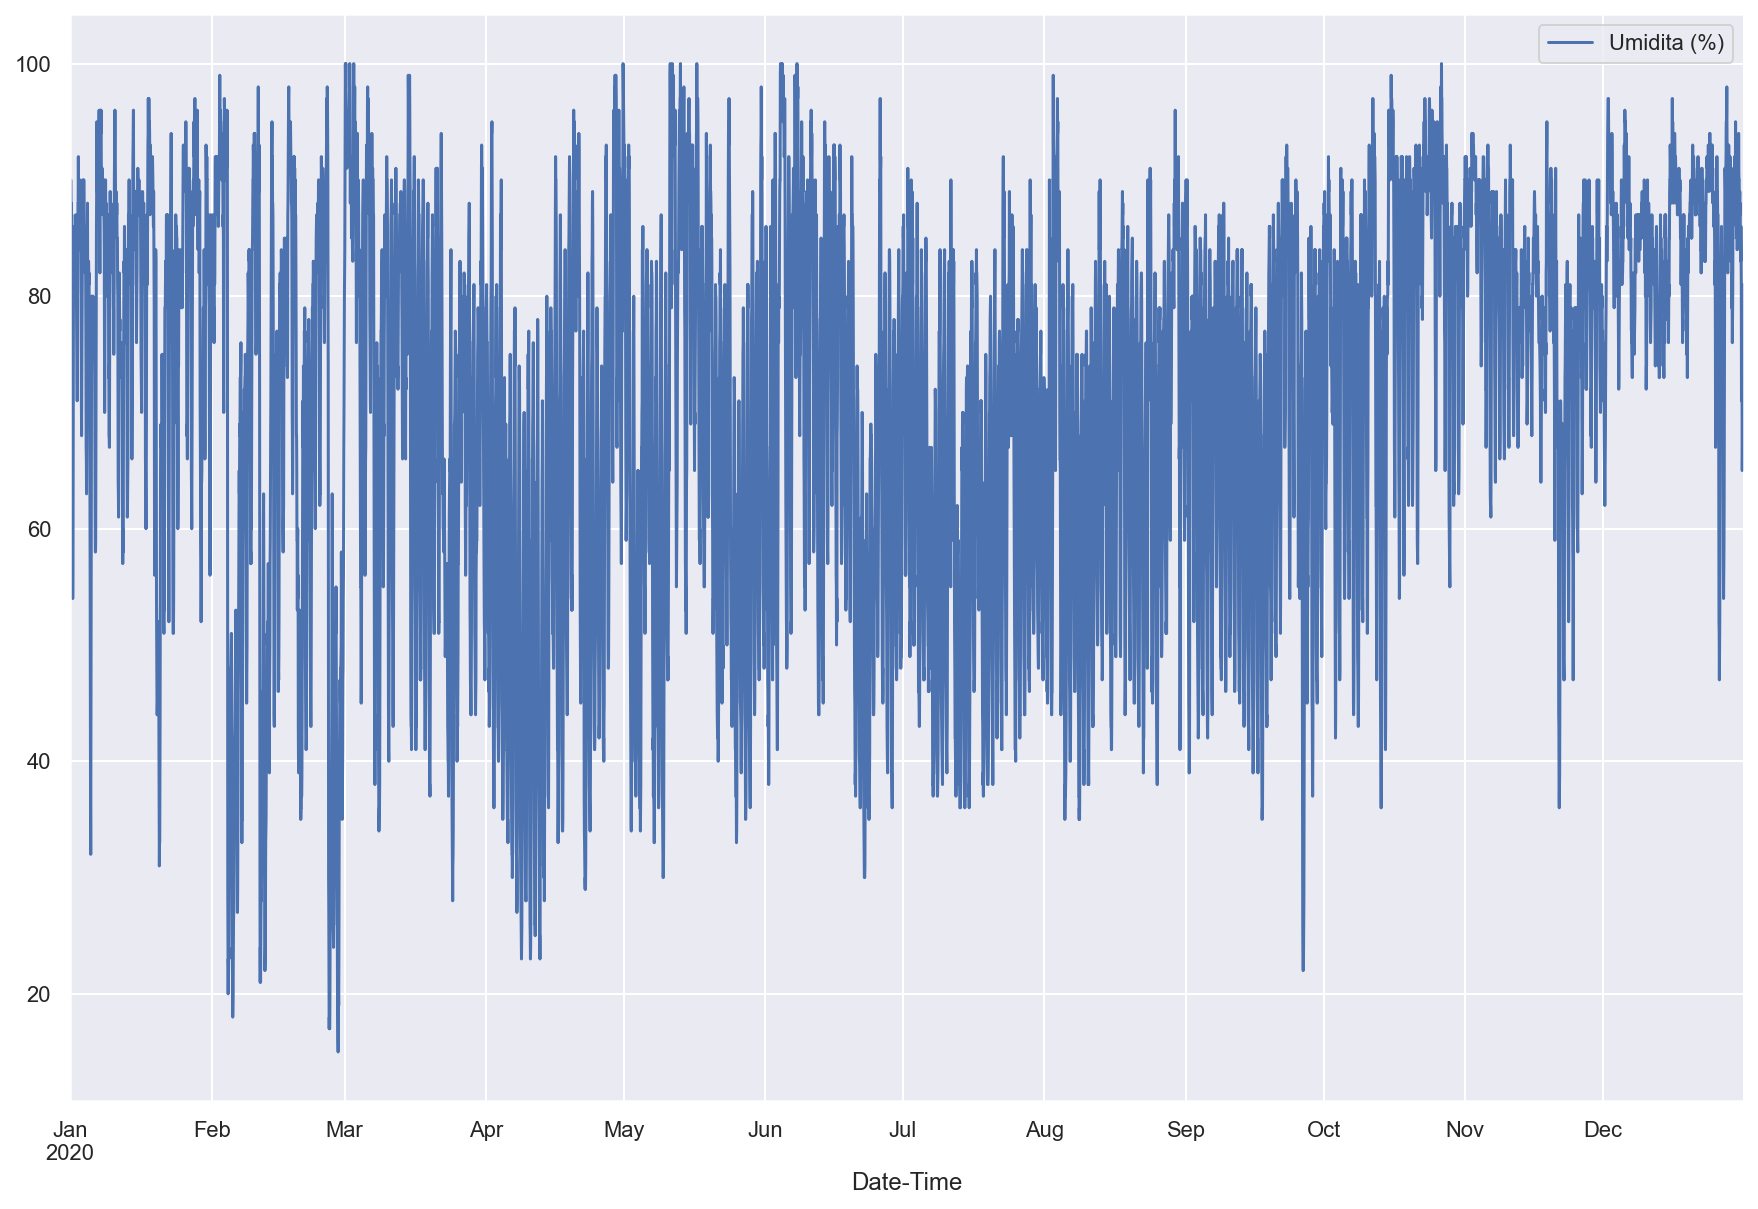

In [42]:
anno='2020'
for i in df_consuntivi_meteo.columns:
    df_consuntivi_meteo[i][anno].plot()
    plt.legend()
    plt.show()